# Abgabe 7

2. sequentielle Regionenmarkierung für Binärbilder

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

After Pass 1 - initial labels:
[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]

After Pass 2 - merging of labels/ collision sets (R):
{3, 6, 8, 10, 12}
{14}
{2, 4, 5, 7, 9, 11, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35}

After Pass 3 - final labeled image:
[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]

After Pass 1 - initial labels:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

After Pass 2 - merging of labels/ collision sets (R):
{2}
{4}
{3, 5, 6, 7, 8, 10, 11, 12, 13}
{9}
{16, 15}
{17}
{18, 27, 28}
{14, 19, 20, 21, 22, 23, 24, 25, 26}

After Pass 3 - final labeled image:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



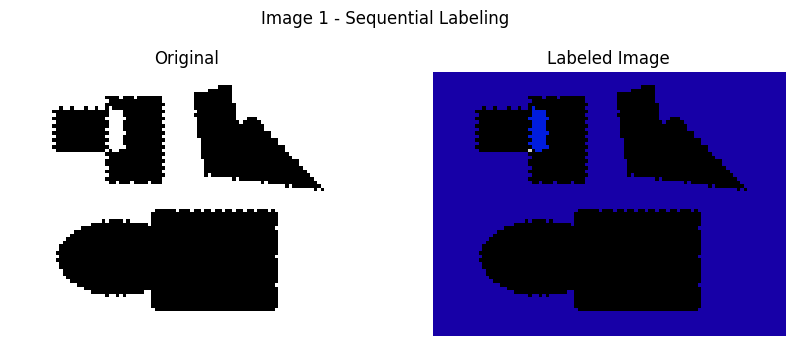

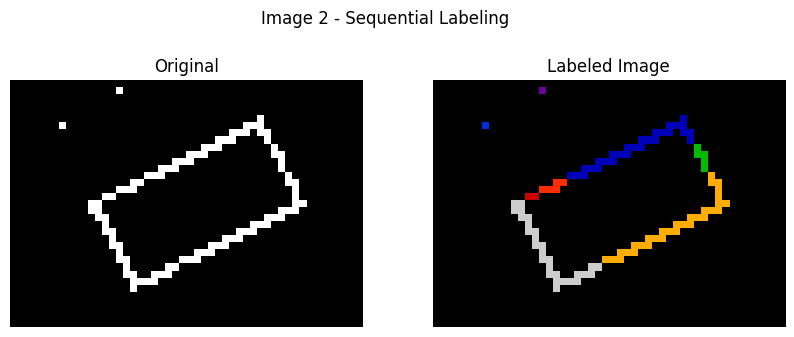

In [55]:
#finds the set in L 
def find_set(label, L):
        for s in L:
            if label in s:
                return s
        return None

def sequential_labeling(I):
    height, width = I.shape

    labeled = np.zeros_like(I, dtype=int) #copy
    
    m = 2  #the value of the next label to be assigned
    C = []  #list for the collision-sets

    # Pass 1 - Assign Initial Labels
    for v in range(height):
        for u in range(width):
            if I[v, u] == 1:  #foreground
                neighbors = []

                #analyse neighbors (check previous pixels)
                #pixel above
                if v > 0 and labeled[v-1, u] > 1:
                    neighbors.append(labeled[v-1, u])
                #pixel to the left
                if u > 0 and labeled[v, u-1] > 1:
                    neighbors.append(labeled[v, u-1])

                #all neighbors are background pixels
                if len(neighbors) == 0:
                    labeled[v, u] = m
                    m += 1
                #exactly one of teh neighbors has a label value
                elif len(neighbors) == 1:
                    labeled[v, u] = neighbors[0]
                #several neighbors have label values
                else:
                    min_label = min(neighbors) #select the min as the new label
                    labeled[v, u] = min_label
                    for lbl in neighbors:
                        if lbl != min_label:
                            collision_pair = {lbl, min_label}
                            if collision_pair not in C: #register the pair as label collision
                                C.append(collision_pair) 

    print("After Pass 1 - initial labels:")
    print(labeled)
    print()

    # Pass 2 - Resolve Label Collisions
    # L = {2,3,...,m-1} set of the region labels
    L = [set([i]) for i in range(2, m)]  #partitioning, obe set for each label

    for collision in C:
        a, b = tuple(collision)
        Ra = find_set(a, L)
        Rb = find_set(b, L)
        if Ra != Rb:
            Ra.update(Rb) #union of Ra and Rb
            L.remove(Rb)

    print("After Pass 2 - merging of labels/ collision sets (R):")
    for s in L:
        print(s)
    print()


    # Pass 3 - Relabel the Image
    for v in range(height):
        for u in range(width):
            val = labeled[v, u]
            if val > 1:
                s = find_set(val, L)
                labeled[v, u] = min(s) #replacing the image label with the minimum value (representative element)

    print("After Pass 3 - final labeled image:")
    print(labeled)
    print()

    return labeled


def plot_image(original, labeled, title=""):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(original, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Labeled Image")
    plt.imshow(labeled, cmap='nipy_spectral')
    #plt.imshow(labeled, cmap='tab20')
    
    plt.axis('off')

    plt.suptitle(title)
    plt.show()

#test
images = [io.imread("regionen1.png", as_gray=True), io.imread("regionen2.png", as_gray=True)]

#binarization (0=backgroung, 1=foreground)
images = [(img > 0).astype(int) for img in images]

labeled1 = sequential_labeling(images[0])
labeled2 = sequential_labeling(images[1])

plot_image(images[0], labeled1, "Image 1 - Sequential Labeling")
plot_image(images[1], labeled2, "Image 2 - Sequential Labeling")
